In [1]:
# import essential packages
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import csv
import json
import numpy as np
import os

import itertools
import collections

import tweepy
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

In [2]:
from utils.text_wapper import remove_url
import json

In [3]:
# config data
inputFolder = "./twitter-data-geo-output"

In [4]:
tweetsText = []
for file in os.listdir(inputFolder):
    filePath = "{}/{}".format(inputFolder, file)
    with open(filePath, "r") as jsonFile:
        jsf = json.load(jsonFile)
        for j in jsf:
            if j['lang'] == 'en':
                tweetsText.append(j['text'])
    break

In [5]:
sentiment_objects = [TextBlob(tweet) for tweet in tweetsText]
sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("current weather in Burlington: overcast clouds, 36°F
 69% humidity, wind 5mph, pressure 1027mb"))

In [6]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.head()

,polarity,tweet
0,0.0,"current weather in Burlington: overcast clouds, 36°F\n69% humidity, wind 5mph, pressure 1027mb"
1,0.0,"Flash Flood Warning continues for Nixa MO, Ozark MO, Cassville MO until 5:15 PM CDT https://t.co/Ic2MQ8yzSd"
2,-0.3,"Wind 0.0 mph NNW. Barometer 29.83 in, Rising slowly. Temperature 40.8 °F. Rain today 0.00 in. Humidity 86%"
3,0.0,"MED - MEDICAL at 6300 SE DIVISION ST, PORT [Portland Fire #RP20000023885] 02:53 #pdx911"
4,0.0,73.2F (Feels: 77.1F) - Humidity: 93% - Wind: 4.3mph ESE - Gust: 6.8mph - Pressure: 30.188in #weather https://t.co/75yzNJ23Eh


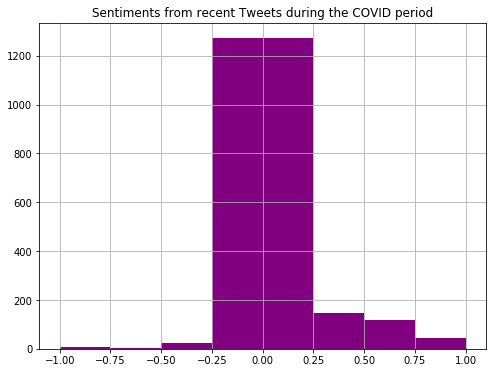

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from recent Tweets during the COVID period")
plt.show()

In [37]:
sentiment_df.sort_values(by=['polarity'])

,polarity,tweet
1616,-1.0,"Now, that is a skyline. Even with the devastating tornado that ripped through a residential area about 10 minutes f… https://t.co/DAZ3Rxqtmj"
525,-1.0,It’s so disgusting to watch artists and producers I respect compromise they art just for views and likes posting su… https://t.co/IMaXPBofzs
1293,-1.0,Christ is with us... LET US NOT BE AFRAID!!! #jpii #nocateecatholic #coronavírus #letpeacebeginwithme @ St. John Pa… https://t.co/xXG2i8ASYC
583,-1.0,It’s so disgusting to watch artists and producers I respect compromise they art just for views and likes posting su… https://t.co/xVVyzcjJGC
1463,-0.8,"#trueshit #facts #realshit @ Andrews Air Force Base, Maryland https://t.co/jeCyA6ZuPs"
...,...,...
1535,1.0,"Dear parents, teachers, librarians, youngsters:\n\nThursday morning an awesome group of children's book authors are d… https://t.co/ucVxslc9G8"
716,1.0,Visit hudsonvalleycharcuterie link for ordering and more info!!!! #Repost @ravenandboar with @get_repost\n・・・\nDe… https://t.co/r49GmGySG9
1567,1.0,"Happy Spring 2020! #spring2020 #goodmoring #dadeville @ Dadeville, Alabama https://t.co/QwaXGYl12J"
1417,1.0,Happy St. Joseph’s Day! We take this opportunity to applaud all of our ICS dads in honor of St. Joseph! Show us you… https://t.co/00cMpghBpe
